## Data Preprocessing

Loading Environments

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Data Cleaning

In [ ]:
data = pd.read_csv('sleepdata.csv')

In [ ]:
print("NaN:\n") # To inspect the NaN values
print(data.isnull().sum())

NaN:

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [ ]:
print("DUPLICATED\n") # To inspect how many duplicated values
print(data.duplicated().sum())

DUPLICATED

0


In [ ]:
# There are 219 NaN values where the patient has no sleep disorder, need to be corrected.
rows = data[pd.isna(data["Sleep Disorder"])]
rows

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,342,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,NaN
342,343,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,NaN
343,344,Female,57,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,NaN
358,359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,NaN


In [ ]:
data = data.fillna("Nothing")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Nothing
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nothing
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nothing
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# In BMI column, normal and normal weight mean the same thing, need to name them the same.
data["BMI Category"] = data["BMI Category"].replace("Normal Weight", "Normal")

In [ ]:
# There are incosistencies on gender and person ID, need to corrected.
no_duplicates = data.drop_duplicates(subset=['Person ID', 'Gender'])
data['Stress Level'].value_counts()

Stress Level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64

In [ ]:
# Now listing the value to check if they are correct.
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Person ID,374
Gender,2
Age,31
Occupation,11
Sleep Duration,27
Quality of Sleep,6
Physical Activity Level,16
Stress Level,6
BMI Category,3
Blood Pressure,25


In [ ]:
# We need to fix the "blood pressure" column since it shows bothe high and low pressure.
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric type
data[['Systolic BP', 'Diastolic BP']] = data[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)

# Drop the original 'Blood Pressure' column
data = data.drop('Blood Pressure', axis=1)

data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Nothing,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Nothing,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Nothing,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [ ]:
# We can drop person ID since it will not be used.
data.drop('Person ID', axis=1, inplace=True)

# Feature Extraction

Data Visualisation


Data Dictionary

* Person ID: An identifier for each individual.
* Gender: The gender of the person (Male/Female).
* Age: The age of the person in years.
* Occupation: The occupation or profession of the person.
* Sleep Duration (hours): The number of hours the person sleeps per day.
* Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
* Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
* Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
* BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
* Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
* Heart Rate (bpm): The resting heart rate of the person in beats per minute.
* Daily Steps: The number of steps the person takes per day.

In [ ]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Systolic BP', 'Diastolic BP'],
      dtype='object')

In [ ]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [ ]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Nothing,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Nothing,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Nothing,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [ ]:
data.tail()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [ ]:
print("SHAPE: ",data.shape)
print("SIZE: ",data.size)

SHAPE:  (374, 13)
SIZE:  4862


In [ ]:
data["Occupation"].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [ ]:
print(data["BMI Category"].value_counts())

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64


In [ ]:
print(data["Gender"].value_counts())

Gender
Male      189
Female    185
Name: count, dtype: int64


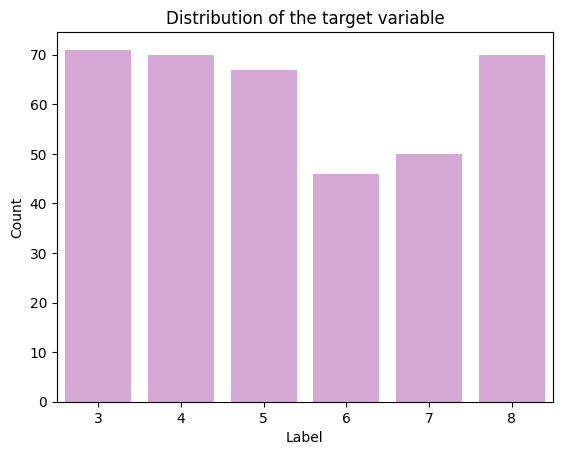

In [ ]:
sns.countplot(x='Stress Level', data=data, color='plum')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of the target variable')

# Displaying the plot
plt.show()

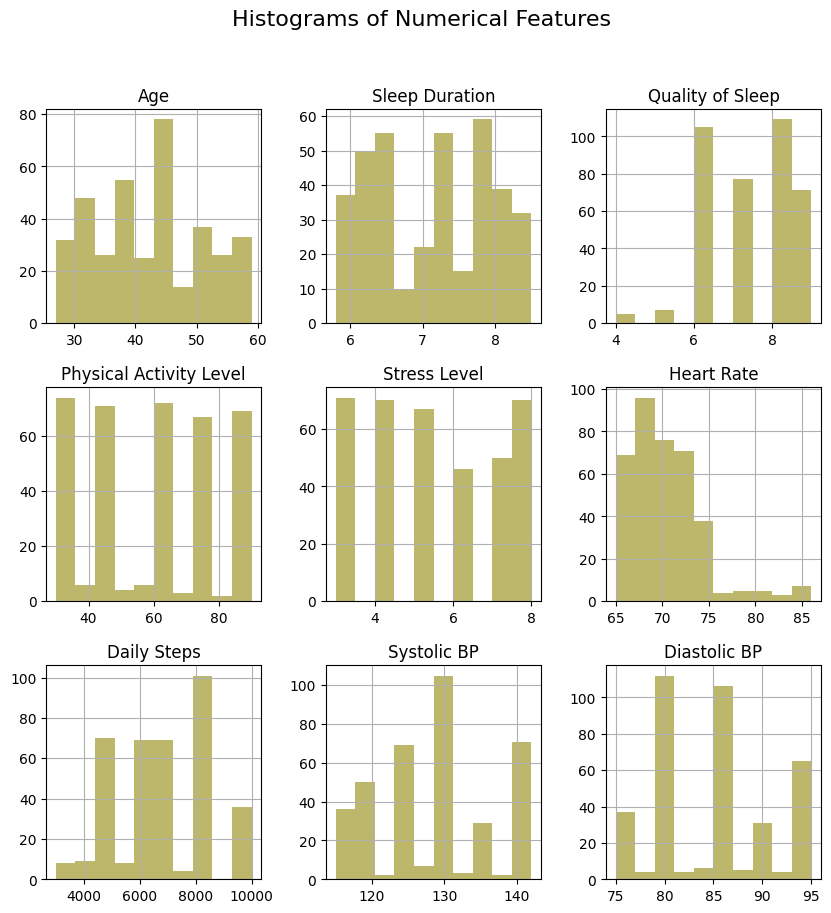

In [ ]:
# Produce a histgram for each feature.
data.hist(figsize=(10, 10), color='darkkhaki')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

In [ ]:
# Pie graph for occupation.
fig = px.pie(data['Occupation'].value_counts(),
              names=data['Occupation'].value_counts().index,
              title='Distribution of Occupation', width=600, height=500)
fig.show()

In [ ]:
# Quality of Sleep by occupation.
fig = px.box(data, x='Quality of Sleep', y='Occupation', title='Quality of Sleep Distribution by Occupation', color_discrete_sequence=['peru'])
fig.update_layout(xaxis_title='Quality of Sleep', yaxis_title='Occupation', width=600, height=500)
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

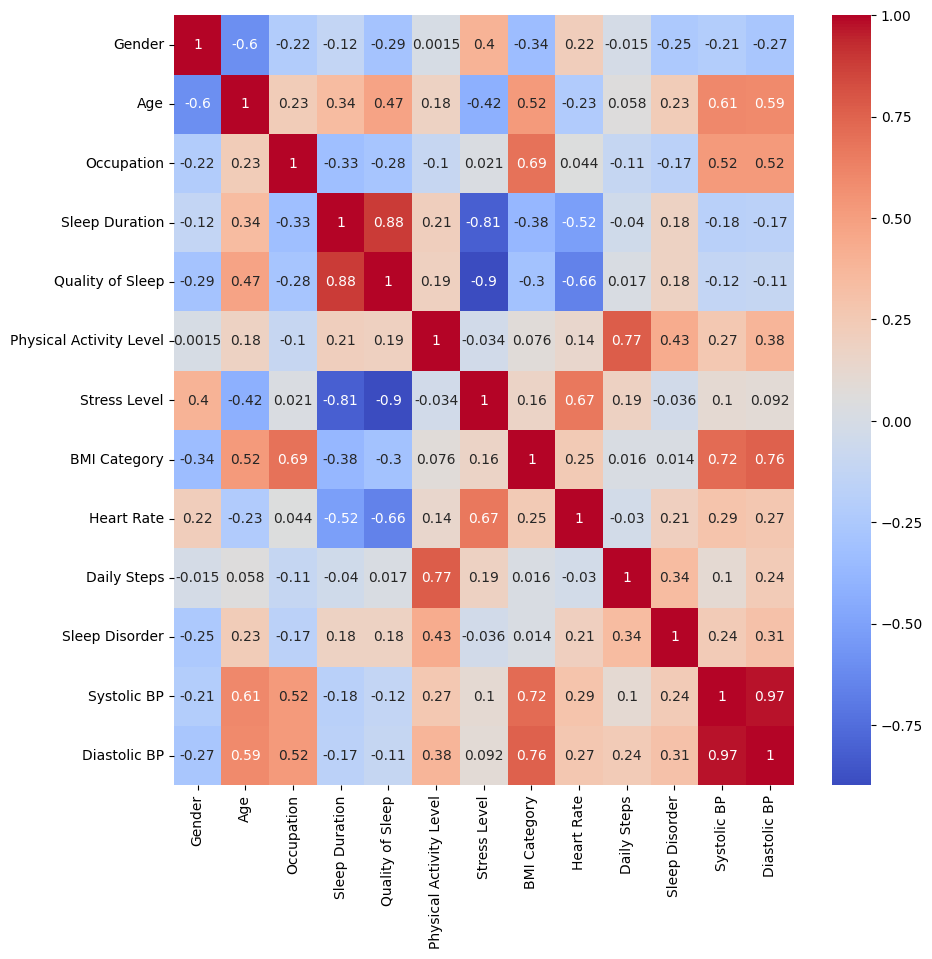

In [ ]:
# Heatmap
plt.figure(figsize = (10, 10))
data['Gender'] = data['Gender'].astype('category').cat.codes
data['Occupation'] = data['Occupation'].astype('category').cat.codes
data['BMI Category'] = data['BMI Category'].astype('category').cat.codes
data['Sleep Disorder'] = data['Sleep Disorder'].astype('category').cat.codes
sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True)

plt.show

1. Positively Correlated columns:
* "Quality of Sleep" and "Sleep Duration"
* "Occupation" and "BMI Category"
* "Systolic BP" and "BMI Category"
* "Diastolic BP" and "BMI Category"

2. Negatively Correlated columns:
* "Heart Rate" and "Quality of Sleep"
* "Heart Rate" and "Sleep Duration"

3. Weak correlation with Target column: Quality of Sleep:
* "Daily Steps"
* 'Systolic BP'
* 'Diastolic BP'


In [ ]:
# Drop Daily Steps
data.drop('Daily Steps', axis=1, inplace=True)
data.drop('Diastolic BP', axis=1, inplace=True)
data.drop('Systolic BP', axis=1, inplace=True)

## Classification

Encoding

In [ ]:
#  For "Occupation", "BMI Category", and "Sleep Disorder Columns", we need to encode them.
from sklearn.preprocessing import LabelEncoder, StandardScaler #encoding categorical data (text labels) into numerical labels
label_encoder=LabelEncoder()

In [ ]:
cat_cols=['Gender','Occupation','BMI Category','Sleep Disorder'] # contains the names of the categorical columns that want to encode
for col in cat_cols:                                              # loop through each categorical column
    data[col] = label_encoder.fit_transform(data[col])

data.tail()
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder
0,1,27,9,6.1,6,42,6,2,77,1
1,1,28,1,6.2,6,60,8,0,75,1
2,1,28,1,6.2,6,60,8,0,75,1
3,1,28,6,5.9,4,30,8,1,85,2
4,1,28,6,5.9,4,30,8,1,85,2


In [ ]:
from sklearn.model_selection import train_test_split    # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix            # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report       # Import the classification_report function for detailed classification metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Split the data into x and y.
X = data.drop(['Quality of Sleep'], axis=1)
y = data['Quality of Sleep']

In [ ]:
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% of the data will be allocated to the testing set. 80% for training set

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (299, 9)
y_train shape: (299,)
X_test shape: (75, 9)
y_test shape: (75,)


Naive Bayes

In [ ]:
naive_bayes = GaussianNB() #Gaussian Naive Bayes algorithm a probabilistic method for classification tasks.
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [ ]:
# See the performance score
naive_bayes.score(X_test,y_test)

0.8133333333333334

In [ ]:
y_predict = naive_bayes.predict(X_test)

In [ ]:
# Confusion Matrix
matrix = confusion_matrix(y_test, y_predict) #calculate and display the confusion matrix for your machine learning model's performance
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[ 1  0  0  1  0  0]
 [ 0  1  0  0  0  0]
 [ 0  3 23  0  0  0]
 [ 0  0  1  7  8  0]
 [ 0  0  0  1 17  0]
 [ 0  0  0  0  0 12]]


In [ ]:
classification_report = classification_report(y_test, y_predict)
print("Classification Report:\n", classification_report)

test_accuracy = accuracy_score(y_test, y_predict) * 100
print(f"Naive Bayes Test Accuracy: {test_accuracy:.2f}%")  # f-string formatting

Classification Report:
               precision    recall  f1-score   support

           4       1.00      0.50      0.67         2
           5       0.25      1.00      0.40         1
           6       0.96      0.88      0.92        26
           7       0.78      0.44      0.56        16
           8       0.68      0.94      0.79        18
           9       1.00      1.00      1.00        12

    accuracy                           0.81        75
   macro avg       0.78      0.79      0.72        75
weighted avg       0.85      0.81      0.81        75

Naive Bayes Test Accuracy: 81.33%


Naive Bayes gives a accurancy of 80%.

Logistic Regression




In [ ]:
# Define and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear')  # Specify solver
logistic_model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = logistic_model.predict(X_test)

# Evaluate model performance
confusion_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[ 2  0  0  0  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1 25  0  0  0]
 [ 0  0  0 14  2  0]
 [ 0  0  0  0 18  0]
 [ 0  0  0  0  0 12]]


In [ ]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, predictions)
print("Classification Report:\n", classification_report)

test_accuracy = accuracy_score(y_test, predictions) * 100
print(f"Logistic Regression Test Accuracy: {test_accuracy:.2f}%")  # f-string formatting

Classification Report:
               precision    recall  f1-score   support

           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      0.96      0.98        26
           7       1.00      0.88      0.93        16
           8       0.86      1.00      0.92        18
           9       1.00      1.00      1.00        12

    accuracy                           0.95        75
   macro avg       0.81      0.81      0.81        75
weighted avg       0.95      0.95      0.95        75

Logistic Regression Test Accuracy: 94.67%


Logistic regression gives a accurancy of 94.67%.




Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=13)
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=13)

In [ ]:
random_forest.score(X_test,y_test)


1.0

In [ ]:
# Import necessary modules
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict using the trained model
y_predict = random_forest.predict(X_test)

# Evaluate model performance
confusion_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", confusion_matrix)


Confusion Matrix:
 [[ 2  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 26  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 18  0]
 [ 0  0  0  0  0 12]]


In [ ]:
# Generate classification report
classification_report = classification_report(y_test, y_predict)
print("Classification Report:", classification_report)
# Calculate and print test accuracy
test_accuracy = accuracy_score(y_test, y_predict) * 100
print(f"Random Forest Test Accuracy: {test_accuracy:.2f}%")  # f-string formatting

Classification Report:               precision    recall  f1-score   support

           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        12

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Random Forest Test Accuracy: 100.00%


Random Forest gives an accurancy of 100%




KNN Classifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test,y_test)


0.9466666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
y_predict = knn.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[ 2  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1 25  0  0  0]
 [ 0  1  1 13  0  1]
 [ 0  0  0  0 18  0]
 [ 0  0  0  0  0 12]]


In [ ]:
from sklearn.metrics import confusion_matrix

report = metrics.classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         2
           5       0.33      1.00      0.50         1
           6       0.96      0.96      0.96        26
           7       1.00      0.81      0.90        16
           8       1.00      1.00      1.00        18
           9       0.92      1.00      0.96        12

    accuracy                           0.95        75
   macro avg       0.87      0.96      0.89        75
weighted avg       0.97      0.95      0.95        75



KNN Classifier gives and accurancy of 98%.



Support Vector Mechanism

In [ ]:
svm_classifier = svm.SVC(kernel='linear')


In [ ]:
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = metrics.classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[ 2  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 26  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 18  0]
 [ 0  0  0  0  0 12]]
Classification Report:
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        12

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



SVM gives and accurancy of 100%.

Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
decision_tree.score(X_test,y_test)

1.0

In [ ]:
y_predict = decision_tree.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[ 2  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 26  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 18  0]
 [ 0  0  0  0  0 12]]


In [ ]:
report = metrics.classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        12

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



Decision Tree gives an accurancy of 100%.

In [ ]:
# Compare the models.

model_names = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Decision Tree']
accuracy_scores = [80, 99, 94, 98, 100, 100]

# Creating a DataFrame
data = {'Model': model_names, 'Accuracy Score': accuracy_scores}
df = pd.DataFrame(data)

# Specifying colors - selecting a color palette
colors = px.colors.qualitative.Pastel
color_discrete_map = {model: color for model, color in zip(model_names, colors)}

# Creating the bar chart
fig = px.bar(df, x='Model', y='Accuracy Score', text='Accuracy Score',
             title='Comparison of Model Accuracy', color='Model',
             color_discrete_map=color_discrete_map)

# Ensuring text is displayed as a percentage and positioned correctly
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(width=700, height=600)

fig.show()


## Simulation

In [ ]:
def get_user_input():
    gender = int(input("Gender (Male: 1, Female: 0): "))
    age = int(input("Age: "))
    print( "['Scientist =0','Doctor =1 ', 'Accountant =2', 'Teacher =3','Manager =4', 'Engineer = 5', 'Sales Representative =6', 'Lawyer =8','Salesperson =7','Software Engineer = 9', 'Nurse = 10']")
    occupation = int(input("Occupation (encoded): "))
    sleep_duration = float(input("Sleep Duration (hours): "))
    bmi_category = int(input("BMI Category (Underweight: 1, Normal: 2, Overweight: 3): "))
    heart_rate = int(input("Heart Rate (bpm): "))
    daily_steps = int(input("Daily Steps: "))
    sleep_disorders = int(input("Sleep Disorder (encoded): "))
    print("['Very good = 0', 'Low = 2,3', 'High =5,6 ', 'Very High = 7,8']")
    stress_level = int(input("Stress level (encoded): "))

    return np.array([[gender, age, occupation, sleep_duration, bmi_category, heart_rate, daily_steps, sleep_disorders, stress_level]])
user_input = get_user_input()

# Predict the stress level using the new classifier
predicted_quality_sleep = random_forest.predict(user_input)

# Print the predicted stress level
if predicted_quality_sleep[0] <= 4:
    print("Predicted Quality Sleep: Very Low")
elif 5 <= predicted_quality_sleep[0] <= 7:
    print("Predicted Quality Sleep: Low")
elif predicted_quality_sleep[0] >= 8:
    print("Predicted Quality Sleep: High")
else:
    print("Predicted Quality Sleep: Good")

print("Predicted Quality Sleep:", predicted_quality_sleep[0])

Gender (Male: 1, Female: 0): 1
Age: 23
['Scientist =0','Doctor =1 ', 'Accountant =2', 'Teacher =3','Manager =4', 'Engineer = 5', 'Sales Representative =6', 'Lawyer =8','Salesperson =7','Software Engineer = 9', 'Nurse = 10']
Occupation (encoded): 5
Sleep Duration (hours): 6
BMI Category (Underweight: 1, Normal: 2, Overweight: 3): 1
Heart Rate (bpm): 74
Daily Steps: 100
Sleep Disorder (encoded): 2
['Very good = 0', 'Low = 2,3', 'High =5,6 ', 'Very High = 7,8']
Stress level (encoded): 7
Predicted Quality Sleep: Low
Predicted Quality Sleep: 6


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

